In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def PlaneFrameElementLength(x1,y1,x2,y2):
    """This function returns the length of the plane frame element whose first node has coordinates (x1,y1) 
    and second node has coordinates (x2,y2)."""
    
    return np.sqrt((x2-x1)*(x2-x1) + (y2-y1)*(y2-y1))

In [3]:
def PlaneFrameElementStiffness(E,A,I,L,theta):
    """This function returns the element stiffness matrix for a plane frame element with modulus of elasticity E,
    cross-sectional area A, moment of inertia I, length L, and angle theta (in degrees). The size of the 
    element stiffness matrix is 6 x 6."""
    x = theta*np.pi/180
    C = np.cos(x)
    S = np.sin(x)
    w1 = A*C*C + 12*I*S*S/(L*L)
    w2 = A*S*S + 12*I*C*C/(L*L)
    w3 = (A-12*I/(L*L))*C*S
    w4 = 6*I*S/L
    w5 = 6*I*C/L
    y = E/L * np.array([[w1, w3, -w4, -w1, -w3, -w4], [w3, w2, w5, -w3, -w2, w5],
                      [-w4, w5, 4*I, w4, -w5, 2*I], [-w1, -w3, w4, w1, w3, w4],
                      [-w3, -w2, -w5, w3, w2, -w5], [-w4, w5, 2*I, w4, -w5, 4*I]])
    return y

In [4]:
def PlaneFrameAssemble(K,k,i,j):
    """"This function assembles the element stiffness matrix k of the plane frame element with nodes i and j 
    into the global stiffness matrix K. This function returns the global stiffness matrix K after the 
    element stiffness matrix k is assembled."""
    temp = [3*i-3, 3*i-2, 3*i-1, 3*j-3, 3*j-2, 3*j-1]
    for i in range(len(temp)):
        for j in range(len(temp)):
            K[temp[i], temp[j]] += k[i, j]
    
    return K


In [5]:
def PlaneFrameElementForces(E,A,I,L,theta,u):
    """This function returns the element force vector given the modulus of elasticity E, 
    the cross-sectional area A, the moment of inertia I, the length L, the angle theta 
    (in degrees), and the element nodal displacement vector u."""
    
    x = theta * np.pi/180
    C = np.cos(x)
    S = np.sin(x)
    w1 = E*A/L
    w2 = 12*E*I/(L*L*L)
    w3 = 6*E*I/(L*L)
    w4 = 4*E*I/L
    w5 = 2*E*I/L
    kprime = np.array([[w1, 0, 0, -w1, 0, 0], [0, w2, w3, 0, -w2, w3], 
                       [0, w3, w4, 0, -w3, w5], [-w1, 0, 0, w1, 0, 0],
                       [0, -w2, -w3, 0, w2, -w3], [0, w3, w5, 0, -w3, w4]])

    T = np.array([[C, S, 0, 0, 0, 0], [-S, C, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0],
                  [0, 0, 0, C, S, 0], [0, 0, 0, -S, C, 0], [0, 0, 0, 0, 0, 1]])
    y = np.dot(kprime,np.dot(T,u))
    
    return y


In [6]:
def PlaneFrameElementAxialDiagram(f, L):
    """"This function plots the axial force diagram for the plane frame element with nodal 
    force vector f and length L."""
    
    x = [0, L]
    z = [-f[0,0] , f[3,0]]
    plt.plot(x,z)
    plt.ylabel('Axial Force (kN)')
    plt.show()

In [7]:
def PlaneFrameElementShearDiagram(f, L):
    """"This function plots the shear force diagram for the plane frame element with nodal 
    force vector f and length L."""
    
    x = [0, L]
    z = [f[1,0] , -f[4,0]]
    plt.plot(x,z)
    plt.ylabel('Shear Force (kN)')
    plt.show()

In [8]:
def PlaneFrameElementMomentDiagram(f, L):
    """"This function plots the bending moment diagram for the plane frame element with nodal 
    force vector f and length L."""
    
    x = [0, L]
    z = [-f[2,0] , f[5,0]]
    plt.plot(x,z)
    plt.ylabel('Shear Force (kN)')
    plt.show()

In [9]:
def PlaneFrameInclinedSupport(T,i,alpha):
    """This function calculates the tranformation matrix T of the inclined 
    support at node i with angle of inclination alpha (in degrees)."""
    x = alpha*pi/180
    T[3*i-3,3*i-3] = np.cos(x)
    T[3*i-3,3*i-2] = np.sin(x)
    T[3*i-3,3*i-1] = 0
    T[3*i-2,3*i-3] = -np.sin(x)
    T[3*i-2,3*i-2] = np.cos(x)
    T[3*i-2,3*i-1] = 0
    T[3*i-1,3*i-3] = 0
    T[3*i-1,3*i-2] = 0
    T[3*i-1,3*i-1] = 1
    return T

In [10]:
##Step 1 : Initializing the problem

E = 210e6
I = 5e-5
A = 2e-2
L1 = 3
L2 = 4
L3 = 3
nodes = [1,2,3,4]
node_connections = [(1,2), (2,3), (3,4)]
length = [L1, L2, L3]
theta = [90, 0, 270]

In [11]:
## Step 2 : Element Stiffness Matrices

k = []

for node in range(len(node_connections)):
    k1 = PlaneFrameElementStiffness(E,A,I,length[node],theta[node])
    k.append(k1)

In [12]:
## Step 3 : Global Stiffness Matrix

K = np.zeros((3*len(nodes), 3*len(nodes)))
for node in range(len(node_connections)):
    K=PlaneFrameAssemble(K,k[node],node_connections[node][0],node_connections[node][1])

K

array([[ 4.66666667e+03,  8.54395250e-11, -7.00000000e+03,
        -4.66666667e+03, -8.54395250e-11, -7.00000000e+03,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 8.54395250e-11,  1.40000000e+06,  4.28626380e-13,
        -8.54395250e-11, -1.40000000e+06,  4.28626380e-13,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-7.00000000e+03,  4.28626380e-13,  1.40000000e+04,
         7.00000000e+03, -4.28626380e-13,  7.00000000e+03,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-4.66666667e+03, -8.54395250e-11,  7.00000000e+03,
         1.05466667e+06,  8.54395250e-11,  7.00000000e+03,
        -1.05000000e+06,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-8.54395250e-11, -1.40000000e+06, -4.2862638

In [13]:
## Step 4 : Applying Boundary Conditions

U=np.zeros((len(nodes)*3,1))   
F=np.zeros((len(nodes)*3,1))   

U[0,0] = 0
U[1,0] = 0
U[2,0] = 0
U[9,0] = 0
U[10,0] = 0
U[11,0] = 0

F[3,0] = -20
F[4,0] = 0
F[5,0] = 0
F[6,0] = 0
F[7,0] = 0
F[8,0] = 12



In [14]:
## Step 5 : Solving the Equations

bound = [3, 4, 5, 6, 7, 8]

Up=U[bound]
Fp=F[bound]
Kpp=K[bound]
Kpp=Kpp[:,bound]


Up=np.dot(np.linalg.inv(Kpp),Fp)
print("Displacements and Rotations at Node 2 and 3 are [U2x U2y Phi2 U3x U3y Phi3]")
print(Up)

Displacements and Rotations at Node 2 and 3 are [U2x U2y Phi2 U3x U3y Phi3]
[[-3.78670354e-03]
 [-6.13322733e-06]
 [ 7.83082258e-04]
 [-3.77926516e-03]
 [ 6.13322733e-06]
 [ 1.40375402e-03]]


In [15]:
## Post - processing

U[bound]=Up

force = []
for i in range(3*len(nodes)):
    if i not in bound:
        force.append(i)

F=np.dot(K,U)
print("Reactions at Node 1, and 4 are [F1x, F21y, M1, F4x, F4y, M4]")
print(F[force,0])

Reactions at Node 1, and 4 are [F1x, F21y, M1, F4x, F4y, M4]
[ 12.18970737   8.58651826 -21.02534895   7.81029263  -8.58651826
 -16.62857802]


In [16]:
## Axial Force, Shear Force and Bending Moment

u = [] 
f = []
for node in node_connections:
    u1 = np.asarray([U[node[0]*3-3], U[node[0]*3-2], U[node[0]*3-1], 
                     U[node[1]*3-3], U[node[1]*3-2], U[node[1]*3-1]])
    u.append(u1)

for i in range(len(node_connections)):
    f1 = PlaneFrameElementForces(E,A,I,length[i],theta[i],u[i])
    f.append(f1)
    print("The Axial Force, Shear Force and Bending Moment in Element " + str(i+1) + " is" + '\n', f1)


The Axial Force, Shear Force and Bending Moment in Element 1 is
 [[  8.58651826]
 [-12.18970737]
 [-21.02534895]
 [ -8.58651826]
 [ 12.18970737]
 [-15.54377315]]
The Axial Force, Shear Force and Bending Moment in Element 2 is
 [[-7.81029263]
 [ 8.58651826]
 [15.54377315]
 [ 7.81029263]
 [-8.58651826]
 [18.80229989]]
The Axial Force, Shear Force and Bending Moment in Element 3 is
 [[ -8.58651826]
 [ -7.81029263]
 [ -6.80229989]
 [  8.58651826]
 [  7.81029263]
 [-16.62857802]]


Axial Force Diagram for Element 1


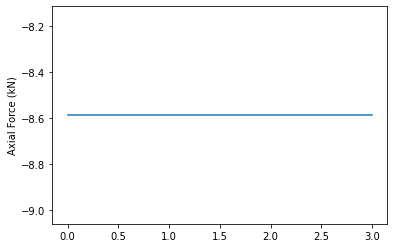

Shear Force Diagram for Element 1


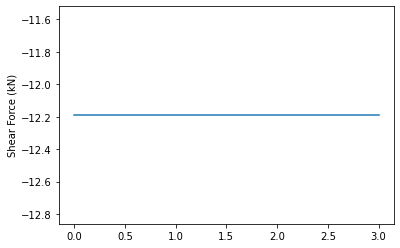

Bending Moment Diagram for Element 1


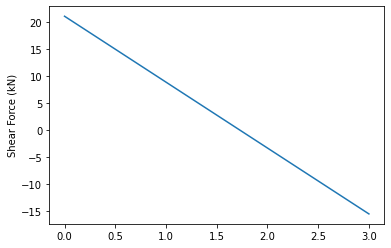

Axial Force Diagram for Element 2


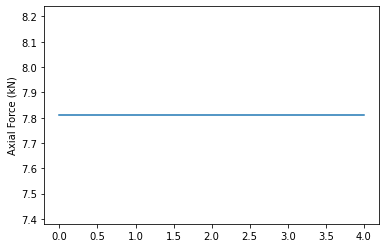

Shear Force Diagram for Element 2


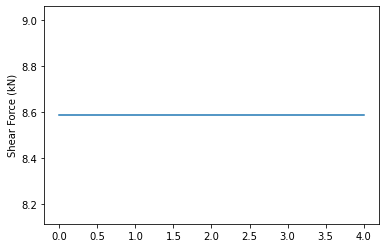

Bending Moment Diagram for Element 2


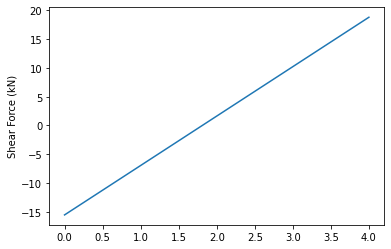

Axial Force Diagram for Element 3


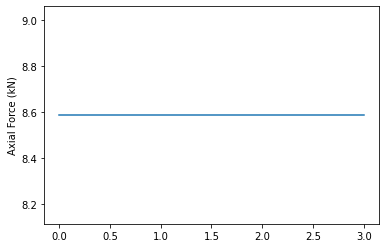

Shear Force Diagram for Element 3


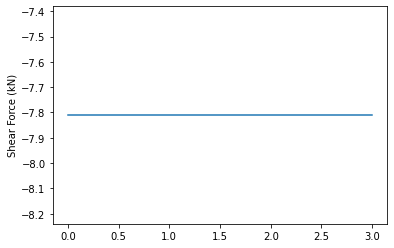

Bending Moment Diagram for Element 3


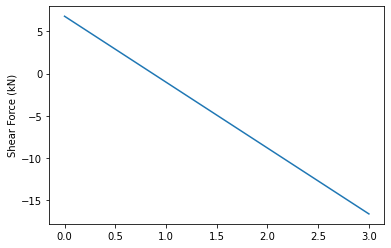

In [17]:
## AFD, SFD and BMD

for i in range(len(f)):
    print("Axial Force Diagram for Element "+ str(i+1))
    PlaneFrameElementAxialDiagram(f[i],length[i])
    print("Shear Force Diagram for Element "+ str(i+1))
    PlaneFrameElementShearDiagram(f[i],length[i])
    print("Bending Moment Diagram for Element "+ str(i+1))
    PlaneFrameElementMomentDiagram(f[i],length[i])
    